In [4]:
import csv 

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

# water 7/10

In [5]:
df_water = pd.read_csv("710_4minwait_water.csv")
df_water["width"] = (df_water["Three-phase point (r) [mm]"] - df_water["Three-phase point (l) [mm]"])/10

df_water.head()

,Step number,CA(m) [°],CA(l) [°],CA(r) [°],Temperature [°C],Elapsed time [s],Three-phase point (l) [mm],Three-phase point (r) [mm],width
0,1,69.79,70.11,69.47,21.4,0.000,16.7,61.5,4.48
1,2,69.56,69.50,69.62,21.4,0.100,16.7,61.4,4.47
2,3,69.26,68.91,69.61,21.4,0.199,16.6,61.5,4.49
3,4,69.34,69.36,69.33,21.4,0.301,16.7,61.5,4.48
4,5,69.14,68.95,69.32,21.4,0.400,16.6,61.5,4.49


In [6]:
split_loc = []

#if there's a jump in the value of three-phase point of more than 1, break up the df bc jump indicates new drop
#look at the Three-phase point column
#look at both index of the row and the value
#while you haven't reached the last row (to prevent index out of range error)
#look at the difference between the value in one row and the next. If the difference is greater than 1 
#df.iloc[index] gives headings for all rows and df.iloc[index][0] gives just the three phase point (mm)
#so basically df.iloc[index][0] gives us the values in the first column 
#if the abs value of the difference is greater than 1, mark this place as the start of a new experiment
#append this to a list holding all the places to split up your df


for index, value in enumerate(df_water["Three-phase point (l) [mm]"]):
    if index < len(df_water) -1: 
        angle_jump = (df_water.iloc[index + 1][6] - df_water.iloc[index][6])
        #print(index, angle_jump)

        if abs(angle_jump) >1:
            split_loc.append(index)

In [7]:
print(split_loc)

[76, 142, 207, 274]


In [8]:
df_water1 = df_water.iloc[:split_loc[0]-1, :]
    
df_water2 = df_water.iloc[split_loc[0]:split_loc[1]-1, :]

df_water3 = df_water.iloc[split_loc[1]:split_loc[2]-1, :]

df_water4 = df_water.iloc[split_loc[2]:split_loc[3], :]

df_water5 = df_water.iloc[split_loc[3]:, :]

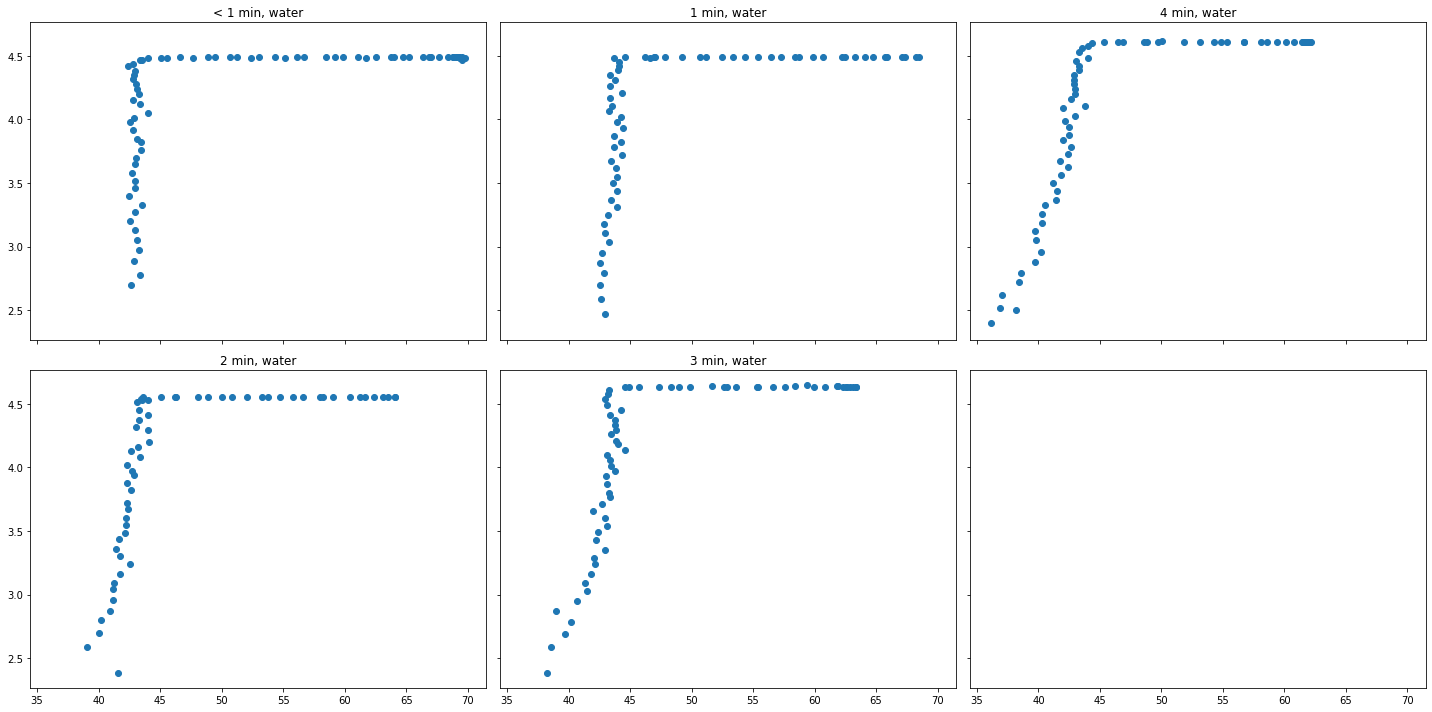

In [94]:



figure, axis = plt.subplots(2, 3, sharex = True, sharey= True, figsize = [20,10])

y_width1 = df_water1["width"]
x_degrees1 = df_water1["CA(m) [°]"]
axis[0,0].plot(x_degrees1, y_width1, 'o')
# axis[0,0].xlabel("angle (degrees)")
# axis[0,0].ylabel("width (mm)")
axis[0,0].set_title("< 1 min, water")




y_width2 = df_water2["width"]
x_degrees2 = df_water2["CA(m) [°]"]
axis[0,1].plot(x_degrees2, y_width2, 'o')
# axis[0,1].xlabel("angle (degrees)")
# axis[0,1].ylabel("width (mm)")
axis[0,1].set_title("1 min, water")




y_width3 = df_water3["width"]
x_degrees3 = df_water3["CA(m) [°]"]
axis[1,0].plot(x_degrees3, y_width3, 'o')
# axis[1,0].xlabel("angle (degrees)")
# axis[1,0].ylabel("width (mm)")
axis[1,0].set_title("2 min, water")




y_width4 = df_water4["width"]
x_degrees4 = df_water4["CA(m) [°]"]
axis[1,1].plot(x_degrees4, y_width4, 'o')
# axis[1,1].xlabel("angle (degrees)")
# axis[1,1].ylabel("width (mm)")
axis[1,1].set_title("3 min, water")



y_width5 = df_water5["width"]
x_degrees5 = df_water5["CA(m) [°]"]
axis[0,2].plot(x_degrees5, y_width5, 'o')
# axis[2,0].xlabel("angle (degrees)")
# axis[2,0].ylabel("width (mm)")
axis[0,2].set_title("4 min, water")

plt.tight_layout()

plt.show()

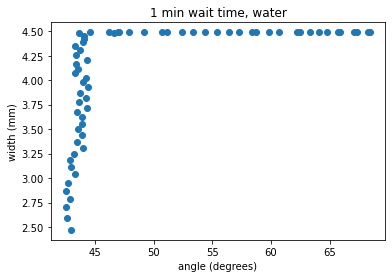

In [10]:
y_width2 = df_water2["width"]
x_degrees2 = df_water2["CA(m) [°]"]
plt.plot(x_degrees2, y_width2, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 min wait time, water")
plt.show()

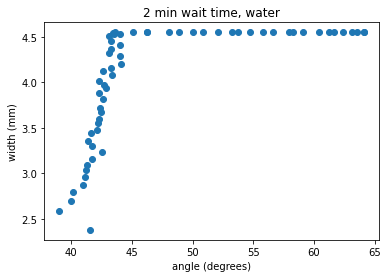

In [11]:
y_width3 = df_water3["width"]
x_degrees3 = df_water3["CA(m) [°]"]
plt.plot(x_degrees3, y_width3, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("2 min wait time, water")
plt.show()

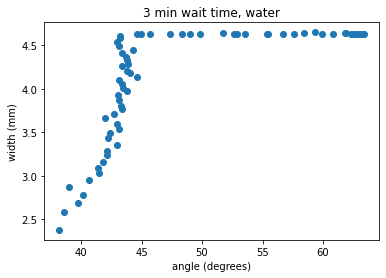

In [12]:
y_width4 = df_water4["width"]
x_degrees4 = df_water4["CA(m) [°]"]
plt.plot(x_degrees4, y_width4, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("3 min wait time, water")
plt.show()

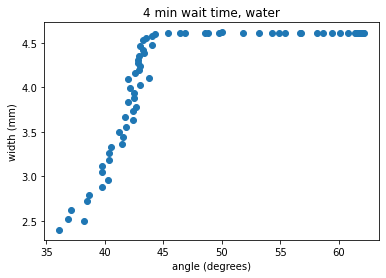

In [13]:
y_width5 = df_water5["width"]
x_degrees5 = df_water5["CA(m) [°]"]
plt.plot(x_degrees5, y_width5, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("4 min wait time, water")
plt.show()

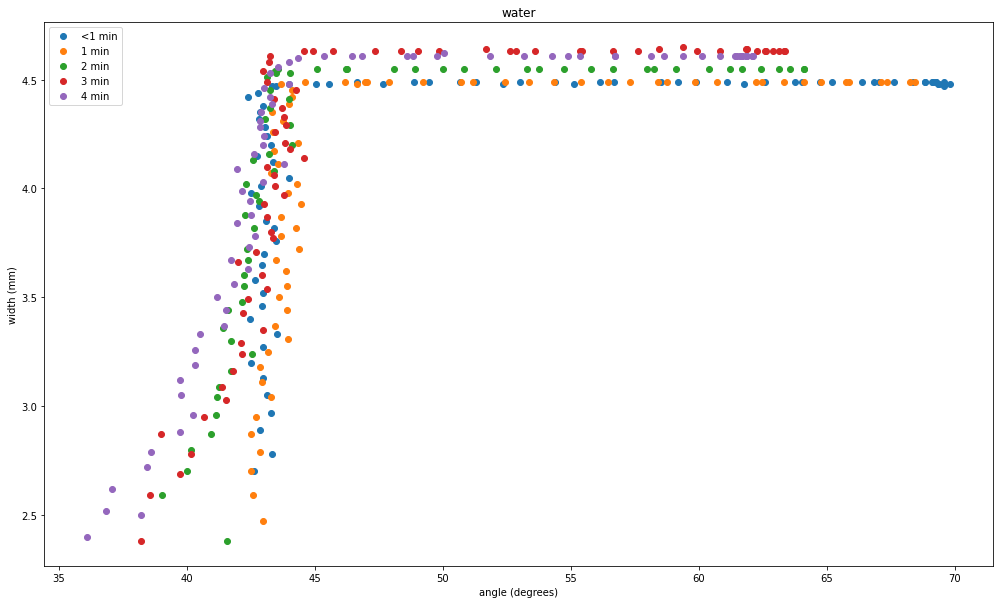

In [96]:
plt.figure(figsize =[17,10])

plt.plot(x_degrees1, y_width1, 'o', label='<1 min')
plt.plot(x_degrees2, y_width2, 'o', label='1 min')
plt.plot(x_degrees3, y_width3, 'o', label='2 min')
plt.plot(x_degrees4, y_width4, 'o',label='3 min')
plt.plot(x_degrees5, y_width5, 'o', label='4 min')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("water")
plt.legend()
plt.show()

# brilliant blue dye 7/10

In [97]:
df_bb = pd.read_csv("710_4minwait_bb(10-5).csv")

In [98]:
df_bb["width"] = (df_bb["Three-phase point (r) [mm]"] - df_bb["Three-phase point (l) [mm]"])/10

df_bb.head()

,Step number,CA(m) [°],CA(l) [°],CA(r) [°],Temperature [°C],Elapsed time [s],Three-phase point (l) [mm],Three-phase point (r) [mm],width
0,1,69.79,70.11,69.47,21.4,0.000,16.7,61.5,4.48
1,2,69.56,69.50,69.62,21.4,0.100,16.7,61.4,4.47
2,3,69.26,68.91,69.61,21.4,0.199,16.6,61.5,4.49
3,4,69.34,69.36,69.33,21.4,0.301,16.7,61.5,4.48
4,5,69.14,68.95,69.32,21.4,0.400,16.6,61.5,4.49


In [99]:
split_loc = []
for index, value in enumerate(df_bb["Three-phase point (l) [mm]"]):
    if index < len(df_bb) -1: 
        angle_jump = (df_bb.iloc[index + 1][6] - df_bb.iloc[index][6])
        #print(index, angle_jump)

        if abs(angle_jump) >1:
            split_loc.append(index)

In [100]:
print(split_loc)

[76, 142, 207, 274, 345, 423, 575, 646]


In [101]:
df_bb1 = df_bb.iloc[split_loc[3]:split_loc[4]-1, :]
    
df_bb2 = df_bb.iloc[split_loc[4]:split_loc[5]-1, :]

df_bb3 = df_bb.iloc[split_loc[5]:split_loc[6]-1, :]

df_bb4 = df_bb.iloc[split_loc[6]:split_loc[7]-1, :]

df_bb5 = df_bb.iloc[split_loc[7]:, :]




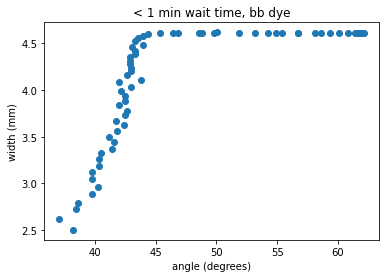

In [102]:
y_width1 = df_bb1["width"]
x_degrees1 = df_bb1["CA(m) [°]"]
plt.plot(x_degrees1, y_width1, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("< 1 min wait time, bb dye")
plt.show()

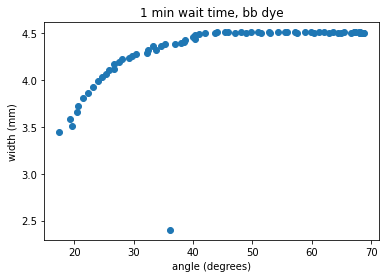

In [103]:
y_width2 = df_bb2["width"]
x_degrees2 = df_bb2["CA(m) [°]"]
plt.plot(x_degrees2, y_width2, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 min wait time, bb dye")
plt.show()

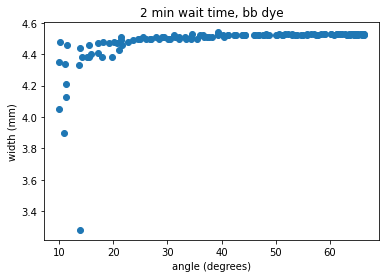

In [104]:
y_width3 = df_bb3["width"]
x_degrees3 = df_bb3["CA(m) [°]"]
plt.plot(x_degrees3, y_width3, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("2 min wait time, bb dye")
plt.show()

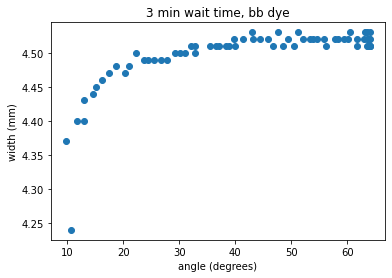

In [105]:
y_width4 = df_bb4["width"]
x_degrees4 = df_bb4["CA(m) [°]"]
plt.plot(x_degrees4, y_width4, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("3 min wait time, bb dye")
plt.show()

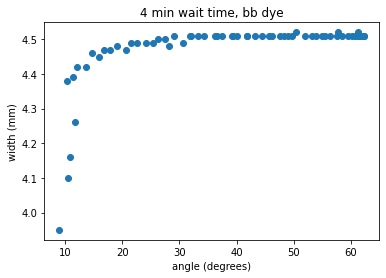

In [106]:
y_width5 = df_bb5["width"]
x_degrees5 = df_bb5["CA(m) [°]"]
plt.plot(x_degrees5, y_width5, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("4 min wait time, bb dye")
plt.show()

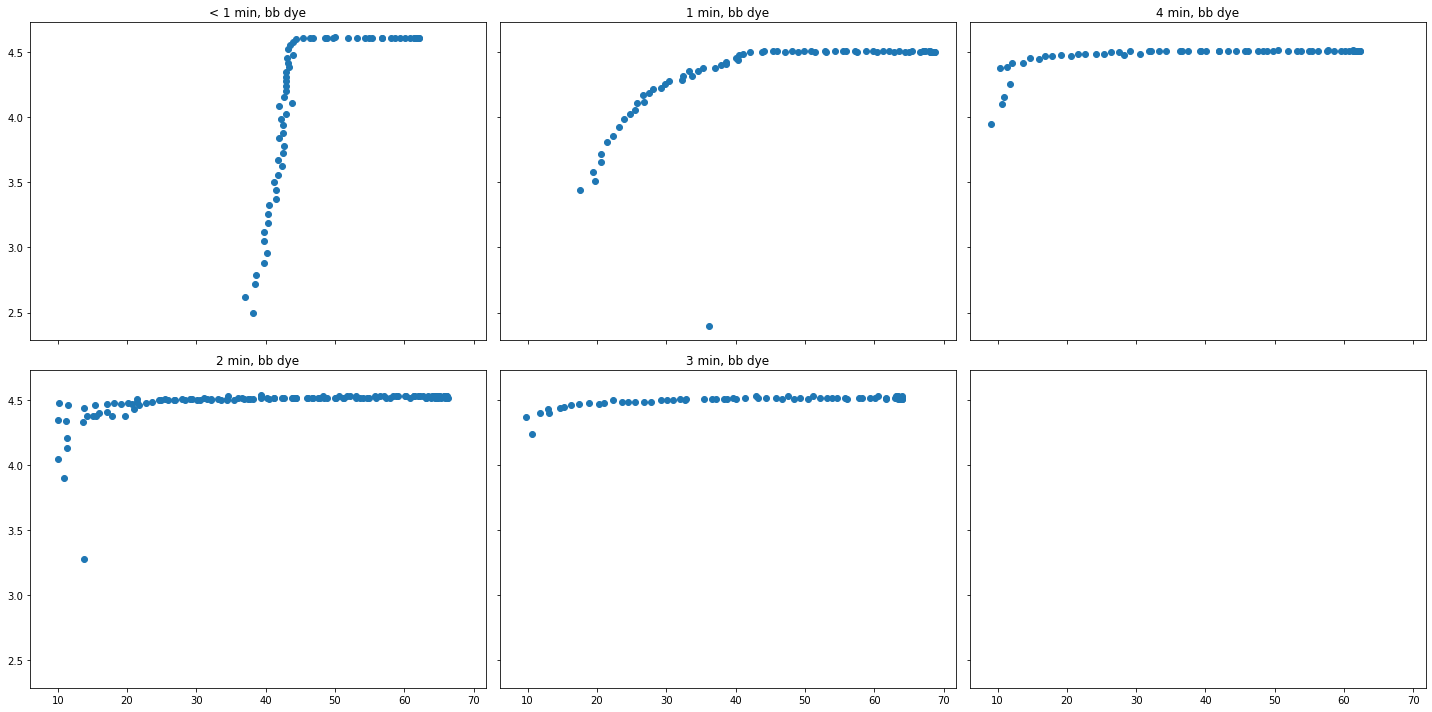

In [108]:
figure, axis = plt.subplots(2, 3, sharex = True, sharey= True, figsize = [20,10])

y_width1 = df_bb1["width"]
x_degrees1 = df_bb1["CA(m) [°]"]
axis[0,0].plot(x_degrees1, y_width1, 'o')
# axis[0,0].xlabel("angle (degrees)")
# axis[0,0].ylabel("width (mm)")
axis[0,0].set_title("< 1 min, bb dye")




y_width2 = df_bb2["width"]
x_degrees2 = df_bb2["CA(m) [°]"]
axis[0,1].plot(x_degrees2, y_width2, 'o')
# axis[0,1].xlabel("angle (degrees)")
# axis[0,1].ylabel("width (mm)")
axis[0,1].set_title("1 min, bb dye")




y_width3 = df_bb3["width"]
x_degrees3 = df_bb3["CA(m) [°]"]
axis[1,0].plot(x_degrees3, y_width3, 'o')
# axis[1,0].xlabel("angle (degrees)")
# axis[1,0].ylabel("width (mm)")
axis[1,0].set_title("2 min, bb dye")




y_width4 = df_bb4["width"]
x_degrees4 = df_bb4["CA(m) [°]"]
axis[1,1].plot(x_degrees4, y_width4, 'o')
# axis[1,1].xlabel("angle (degrees)")
# axis[1,1].ylabel("width (mm)")
axis[1,1].set_title("3 min, bb dye")



y_width5 = df_bb5["width"]
x_degrees5 = df_bb5["CA(m) [°]"]
axis[0,2].plot(x_degrees5, y_width5, 'o')
# axis[2,0].xlabel("angle (degrees)")
# axis[2,0].ylabel("width (mm)")
axis[0,2].set_title("4 min, bb dye")

plt.tight_layout()

plt.show()

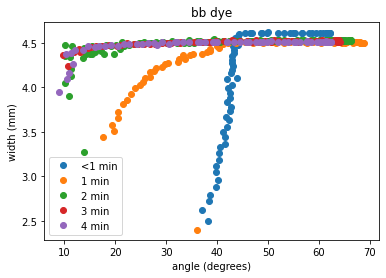

In [25]:
plt.plot(x_degrees1, y_width1, 'o', label='<1 min')
plt.plot(x_degrees2, y_width2, 'o', label='1 min')
plt.plot(x_degrees3, y_width3, 'o', label='2 min')
plt.plot(x_degrees4, y_width4, 'o', label='3 min')
plt.plot(x_degrees5, y_width5, 'o', label='4 min')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("bb dye")
plt.legend()
plt.show()

#this looks weird, but that might be because I was unsure about where to cut off the end (weird angle as the drop nears full aspiration)
# ^^ actually, i'm not sure that's true/makes sense 



# water 7/11

In [26]:
df_11 = pd.read_csv("711_aspiration.csv")

In [27]:
df_11["width"] = (df_11["Three-phase point (r) [mm]"] - df_11["Three-phase point (l) [mm]"])/10

df_11.head()

,CA(m) [°],CA(l) [°],CA(r) [°],Elapsed time [s],Three-phase point (l) [mm],Three-phase point (r) [mm],width
0,67.61,66.65,68.56,0.000,17.4,64.1,4.67
1,66.90,66.16,67.64,0.101,17.3,64.1,4.68
2,67.75,67.45,68.04,0.200,17.4,64.2,4.68
3,67.71,67.25,68.18,0.300,17.4,64.2,4.68
4,67.29,66.84,67.74,0.400,17.4,64.2,4.68


In [48]:
split_loc = []


for index, value in enumerate(df_11["Three-phase point (l) [mm]"]):
    if index < len(df_11) -1: 
        angle_jump = (df_11.iloc[index + 1][3] - df_11.iloc[index][3])
        #print(index, angle_jump)

        if abs(angle_jump) >1:
            split_loc.append(index)

In [49]:
print(split_loc)

[85, 173, 253, 324, 392, 459, 549, 635, 705, 789, 865, 949, 1020, 1095]


In [50]:
df_water_11_1 = df_11.iloc[:split_loc[0]-1, :]
    
df_water_11_2 = df_11.iloc[split_loc[0]:split_loc[1]-1, :]

df_water_11_3 = df_11.iloc[split_loc[1]:split_loc[2]-1, :]

df_water_11_4 = df_11.iloc[split_loc[3]:split_loc[4]-1, :]

df_water_11_5 = df_11.iloc[split_loc[4]:split_loc[5]-1, :]



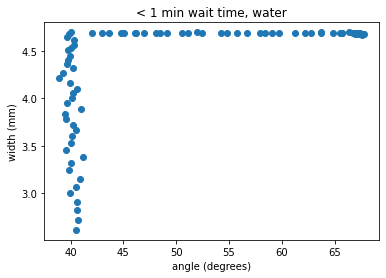

In [51]:
y_width1_water11 = df_water_11_1["width"]
x_degrees1_water11 = df_water_11_1["CA(m) [°]"]
plt.plot(x_degrees1_water11, y_width1_water11, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("< 1 min wait time, water")
plt.show()


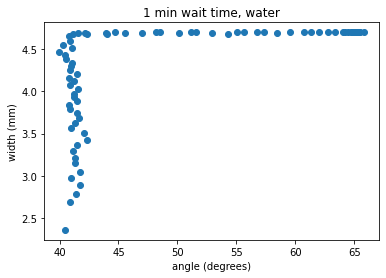

In [52]:
y_width2_water11 = df_water_11_2["width"]
x_degrees2_water11 = df_water_11_2["CA(m) [°]"]
plt.plot(x_degrees2_water11, y_width2_water11, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 min wait time, water")
plt.show()

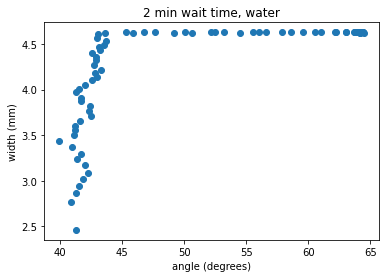

In [53]:
y_width3_water11 = df_water_11_3["width"]
x_degrees3_water11 = df_water_11_3["CA(m) [°]"]
plt.plot(x_degrees3_water11, y_width3_water11, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("2 min wait time, water")
plt.show()

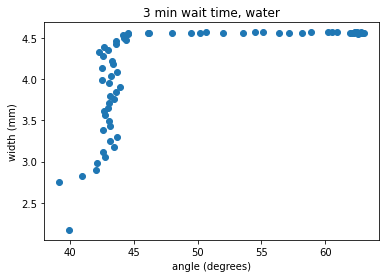

In [54]:
y_width4_water11 = df_water_11_4["width"]
x_degrees4_water11 = df_water_11_4["CA(m) [°]"]
plt.plot(x_degrees4_water11, y_width4_water11, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("3 min wait time, water")
plt.show()


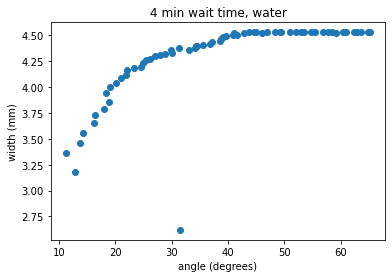

In [55]:
y_width5_water11 = df_water_11_5["width"]
x_degrees5_water11 = df_water_11_5["CA(m) [°]"]
plt.plot(x_degrees5_water11, y_width5_water11, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("4 min wait time, water")
plt.show()


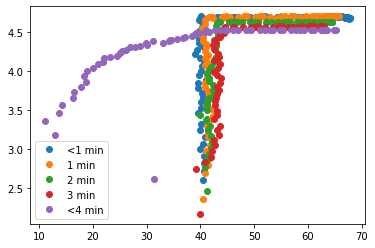

In [56]:
plt.plot(x_degrees1_water11, y_width1_water11, 'o', label = '<1 min')
plt.plot(x_degrees2_water11, y_width2_water11, 'o', label = '1 min')
plt.plot(x_degrees3_water11, y_width3_water11, 'o', label = '2 min')
plt.plot(x_degrees4_water11, y_width4_water11, 'o', label = '3 min')
plt.plot(x_degrees5_water11, y_width5_water11, 'o', label = '<4 min')
plt.legend()
plt.show()

# bb dye 7/11

In [57]:
df_bb_11_1 = df_11.iloc[split_loc[5]:split_loc[6]-1, :]
    
df_bb_11_2 = df_11.iloc[split_loc[6]:split_loc[7]-1, :]

df_bb_11_3 = df_11.iloc[split_loc[7]:split_loc[8]-1, :]

df_bb_11_4 = df_11.iloc[split_loc[8]:split_loc[9]-1, :]

df_bb_11_5 = df_11.iloc[split_loc[9]:split_loc[10]-1, :]

df_bb_11_6 = df_11.iloc[split_loc[10]:split_loc[11]-1, :]
    
df_bb_11_7 = df_11.iloc[split_loc[11]:split_loc[12]-1, :]

df_bb_11_8 = df_11.iloc[split_loc[12]:split_loc[13]-1, :]

df_bb_11_9 = df_11.iloc[split_loc[13]:, :]

# df_bb_11_9 = df_11.iloc[split_loc[13]:split_loc[14]-1, :]

# df_bb_11_10 = df_11.iloc[split_loc[14]:, :]


In [58]:
y_width1_bb11 = df_bb_11_1["width"]
x_degrees1_bb11 = df_bb_11_1["CA(m) [°]"]

y_width2_bb11 = df_bb_11_2["width"]
x_degrees2_bb11 = df_bb_11_2["CA(m) [°]"]

y_width3_bb11 = df_bb_11_3["width"]
x_degrees3_bb11 = df_bb_11_3["CA(m) [°]"]

y_width4_bb11 = df_bb_11_4["width"]
x_degrees4_bb11 = df_bb_11_4["CA(m) [°]"]

y_width5_bb11 = df_bb_11_5["width"]
x_degrees5_bb11 = df_bb_11_5["CA(m) [°]"]

y_width6_bb11 = df_bb_11_6["width"]
x_degrees6_bb11 = df_bb_11_6["CA(m) [°]"]

y_width7_bb11 = df_bb_11_7["width"]
x_degrees7_bb11 = df_bb_11_7["CA(m) [°]"]

y_width8_bb11 = df_bb_11_8["width"]
x_degrees8_bb11 = df_bb_11_8["CA(m) [°]"]

y_width9_bb11 = df_bb_11_9["width"]
x_degrees9_bb11 = df_bb_11_9["CA(m) [°]"]

# y_width10_bb11 = df_bb_11_10["width"]
# x_degrees10_bb11 = df_bb_11_10["CA(m) [°]"]



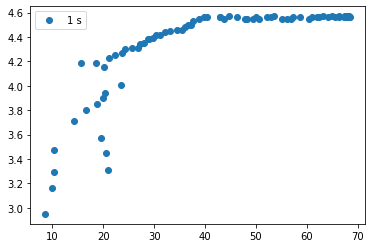

In [39]:
plt.plot(x_degrees1_bb11, y_width1_bb11, 'o', label = '1 s')
plt.legend()
plt.show()

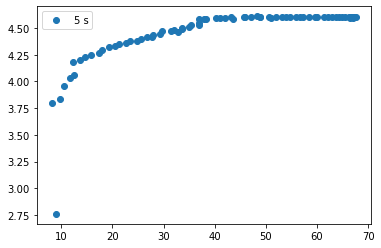

In [40]:
plt.plot(x_degrees2_bb11, y_width2_bb11, 'o', label = '5 s')
plt.legend()
plt.show()

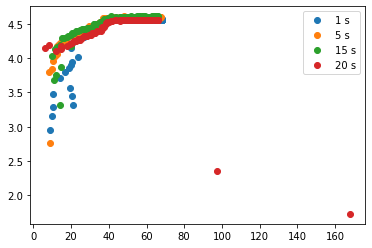

In [41]:
plt.plot(x_degrees1_bb11, y_width1_bb11, 'o', label = '1 s')
plt.plot(x_degrees2_bb11, y_width2_bb11, 'o', label = '5 s')
plt.plot(x_degrees3_bb11, y_width3_bb11, 'o', label = '15 s')
plt.plot(x_degrees4_bb11, y_width4_bb11, 'o', label = '20 s')

plt.legend()
plt.show()

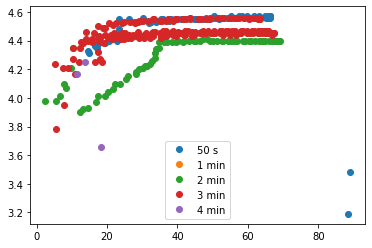

In [42]:
plt.plot(x_degrees5_bb11, y_width5_bb11, 'o', label = '50 s')
plt.plot(x_degrees6_bb11, y_width6_bb11, 'o', label = '1 min')
plt.plot(x_degrees7_bb11, y_width7_bb11, 'o', label = '2 min')
plt.plot(x_degrees8_bb11, y_width8_bb11, 'o', label = '3 min')
plt.plot(x_degrees9_bb11, y_width9_bb11, 'o', label = '4 min')

plt.legend()
plt.show()

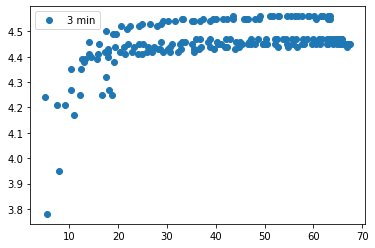

In [43]:
# plt.plot(x_degrees1_bb11, y_width1_bb11, 'o', label = '1 s')
# plt.plot(x_degrees6_bb11, y_width6_bb11, 'o', label = '1 min')
# plt.plot(x_degrees7_bb11, y_width7_bb11, 'o', label = '2 min')
plt.plot(x_degrees8_bb11, y_width8_bb11, 'o', label = '3 min')
# plt.plot(x_degrees9_bb11, y_width9_bb11, 'o', label = '4 min')

plt.legend()
plt.show()

# 7/12

# 7/13

# 7/14

[90, 183, 268, 349, 430, 524, 608, 689, 760, 832, 917, 986, 1084, 1167]


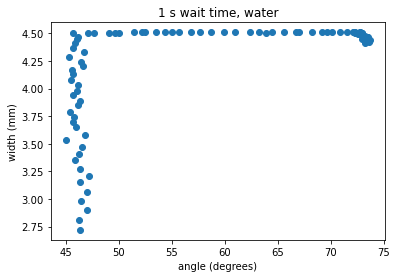

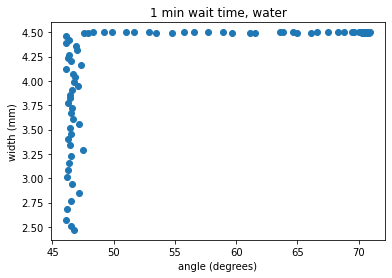

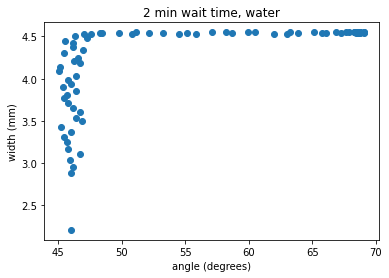

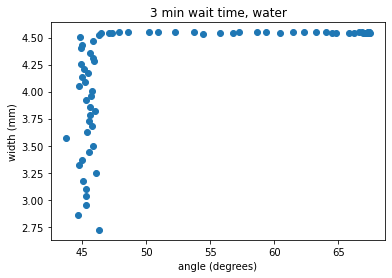

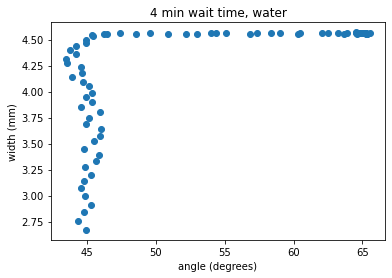

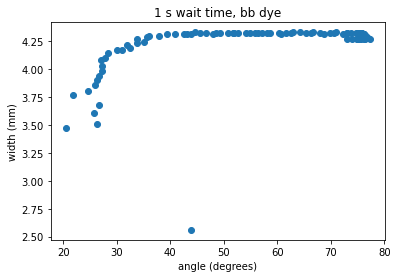

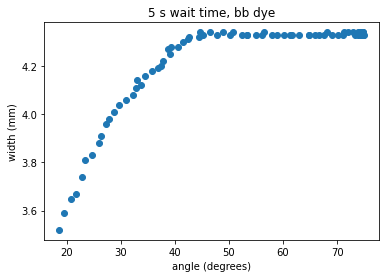

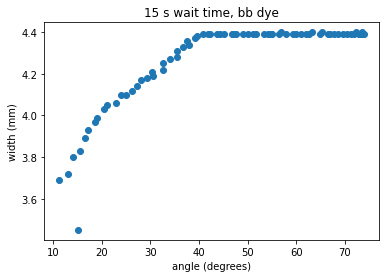

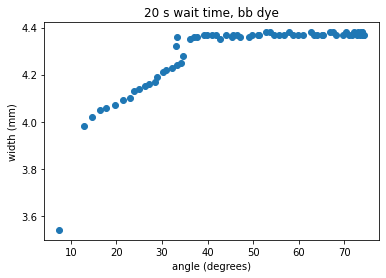

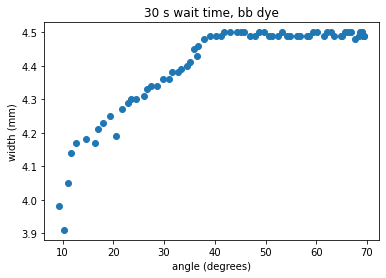

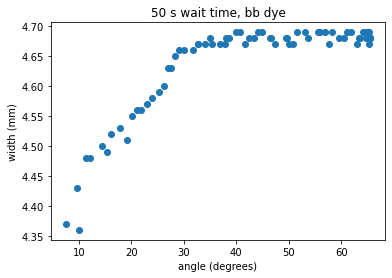

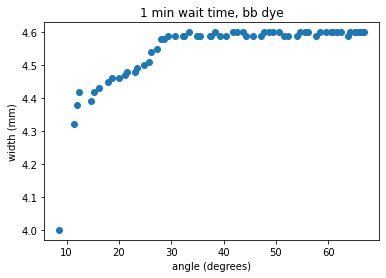

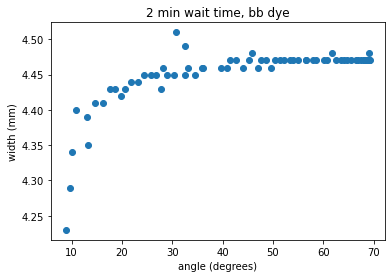

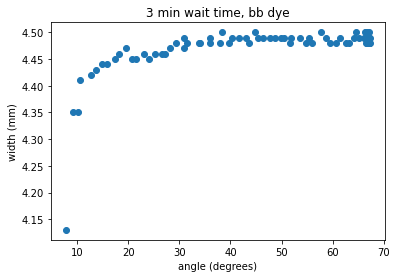

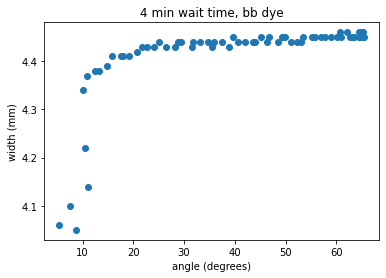

In [47]:
df_14 = pd.read_csv("714_aspiration.csv")

df_14["width"] = (df_14["Three-phase point (r) [mm]"] - df_14["Three-phase point (l) [mm]"])/10

df_14.head()

split_loc_14 = []


for index, value in enumerate(df_14["Three-phase point (l) [mm]"]):
    if index < len(df_14) -1:
         angle_jump = (df_14.iloc[index + 1][3] - df_14.iloc[index][3])
         #print(index, angle_jump)
 
         if abs(angle_jump) > 1:
             split_loc_14.append(index)
 
print(split_loc_14)
 

#water 

df_water_14_1 = df_14.iloc[:split_loc_14[0]-1, :]
 
df_water_14_2 = df_14.iloc[split_loc_14[0]:split_loc_14[1]-1, :]
 
df_water_14_3 = df_14.iloc[split_loc_14[1]:split_loc_14[2]-1, :]

df_water_14_4 = df_14.iloc[split_loc_14[2]:split_loc_14[3]-1, :]

df_water_14_5 = df_14.iloc[split_loc_14[3]:split_loc_14[4]-1, :]


#bb dye 

df_bb_14_1 = df_14.iloc[split_loc_14[4]:split_loc_14[5]-1, :]

df_bb_14_2 = df_14.iloc[split_loc_14[5]:split_loc_14[6]-1, :]

df_bb_14_3 = df_14.iloc[split_loc_14[6]:split_loc_14[7]-1, :]

df_bb_14_4 = df_14.iloc[split_loc_14[7]:split_loc_14[8]-1, :]

df_bb_14_5 = df_14.iloc[split_loc_14[8]:split_loc_14[9]-1 :]


df_bb_14_6 = df_14.iloc[split_loc_14[9]:split_loc_14[10]-1, :]

df_bb_14_7 = df_14.iloc[split_loc_14[10]:split_loc_14[11]-1, :]

df_bb_14_8 = df_14.iloc[split_loc_14[11]:split_loc_14[12]-1, :]

df_bb_14_9 = df_14.iloc[split_loc_14[12]:split_loc_14[13]-1, :]

df_bb_14_10 = df_14.iloc[split_loc_14[13]:, :]

#water

y_width1_water14 = df_water_14_1["width"]
x_degrees1_water14 = df_water_14_1["CA(m) [°]"]
plt.plot(x_degrees1_water14, y_width1_water14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 s wait time, water")
plt.show()

y_width2_water14 = df_water_14_2["width"]
x_degrees2_water14 = df_water_14_2["CA(m) [°]"]
plt.plot(x_degrees2_water14, y_width2_water14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 min wait time, water")
plt.show()

y_width3_water14 = df_water_14_3["width"]
x_degrees3_water14 = df_water_14_3["CA(m) [°]"]
plt.plot(x_degrees3_water14, y_width3_water14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("2 min wait time, water")
plt.show()

y_width4_water14 = df_water_14_4["width"]
x_degrees4_water14 = df_water_14_4["CA(m) [°]"]
plt.plot(x_degrees4_water14, y_width4_water14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("3 min wait time, water")
plt.show()
    
y_width5_water14 = df_water_14_5["width"]
x_degrees5_water14 = df_water_14_5["CA(m) [°]"]
plt.plot(x_degrees5_water14, y_width5_water14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("4 min wait time, water")
plt.show()

#dye 

y_width1_bb14 = df_bb_14_1["width"]
x_degrees1_bb14 = df_bb_14_1["CA(m) [°]"]
plt.plot(x_degrees1_bb14, y_width1_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 s wait time, bb dye")
plt.show()

y_width2_bb14 = df_bb_14_2["width"]
x_degrees2_bb14 = df_bb_14_2["CA(m) [°]"]
plt.plot(x_degrees2_bb14, y_width2_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("5 s wait time, bb dye")
plt.show()

y_width3_bb14 = df_bb_14_3["width"]
x_degrees3_bb14 = df_bb_14_3["CA(m) [°]"]
plt.plot(x_degrees3_bb14, y_width3_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("15 s wait time, bb dye")
plt.show()

y_width4_bb14 = df_bb_14_4["width"]
x_degrees4_bb14 = df_bb_14_4["CA(m) [°]"]
plt.plot(x_degrees4_bb14, y_width4_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("20 s wait time, bb dye")
plt.show()

y_width5_bb14 = df_bb_14_5["width"]
x_degrees5_bb14 = df_bb_14_5["CA(m) [°]"]
plt.plot(x_degrees5_bb14, y_width5_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("30 s wait time, bb dye")
plt.show()
    
    
y_width6_bb14 = df_bb_14_6["width"]
x_degrees6_bb14 = df_bb_14_6["CA(m) [°]"]
plt.plot(x_degrees6_bb14, y_width6_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("50 s wait time, bb dye")
plt.show()

y_width7_bb14 = df_bb_14_7["width"]
x_degrees7_bb14 = df_bb_14_7["CA(m) [°]"]
plt.plot(x_degrees7_bb14, y_width7_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 min wait time, bb dye")
plt.show()

y_width8_bb14 = df_bb_14_8["width"]
x_degrees8_bb14 = df_bb_14_8["CA(m) [°]"]
plt.plot(x_degrees8_bb14, y_width8_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("2 min wait time, bb dye")
plt.show()

y_width9_bb14 = df_bb_14_9["width"]
x_degrees9_bb14 = df_bb_14_9["CA(m) [°]"]
plt.plot(x_degrees9_bb14, y_width9_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("3 min wait time, bb dye")
plt.show()

y_width10_bb14 = df_bb_14_10["width"]
x_degrees10_bb14 = df_bb_14_10["CA(m) [°]"]
plt.plot(x_degrees10_bb14, y_width10_bb14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("4 min wait time, bb dye")
plt.show()
    
    
    

# 7/18

[73, 152, 236, 317, 390, 457, 552, 625, 706]


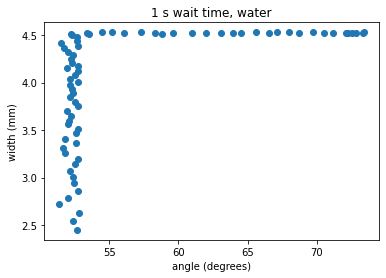

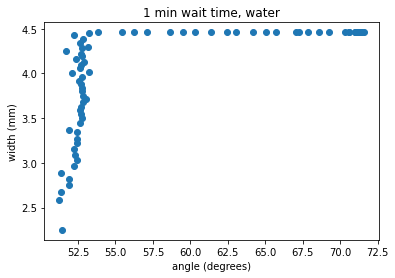

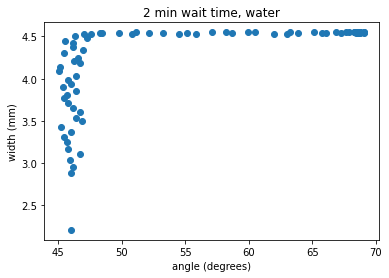

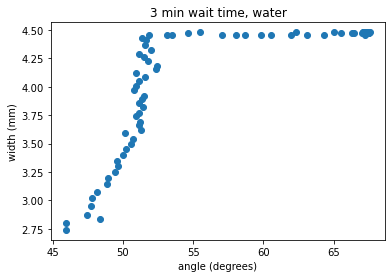

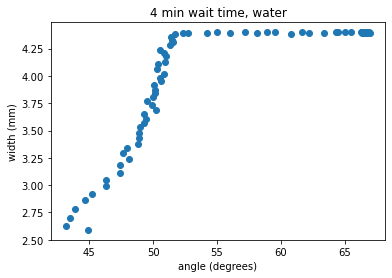

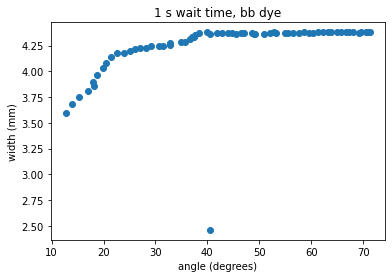

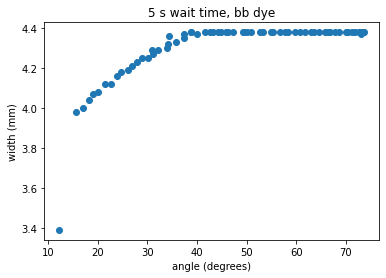

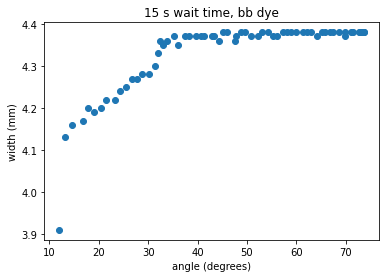

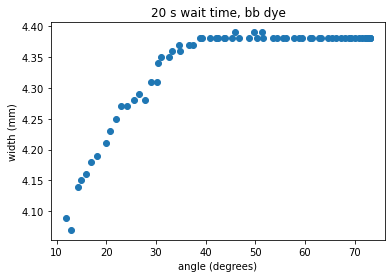

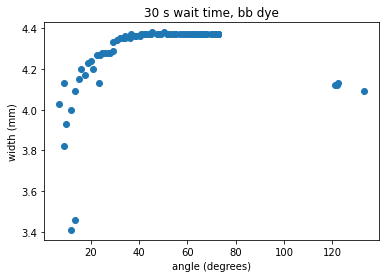

In [112]:
df_18 = pd.read_csv("718_aspiration.csv")

df_18["width"] = (df_18["Three-phase point (r) [mm]"] - df_18["Three-phase point (l) [mm]"])/10

df_18.head()

split_loc_18 = []


for index, value in enumerate(df_18["Three-phase point (l) [mm]"]):
    if index < len(df_18) -1:
         angle_jump = (df_18.iloc[index + 1][3] - df_18.iloc[index][3])
         #print(index, angle_jump)
 
         if abs(angle_jump) > 1:
             split_loc_18.append(index)
 
print(split_loc_18)
 

#water 

df_water_18_1 = df_18.iloc[:split_loc_18[0]-1, :]

df_water_18_2 = df_18.iloc[split_loc_18[0]:split_loc_18[1]-1, :]
 
df_water_18_3 = df_18.iloc[split_loc_18[1]:split_loc_18[2]-1, :]

df_water_18_4 = df_18.iloc[split_loc_18[2]:split_loc_18[3]-1, :]

df_water_18_5 = df_18.iloc[split_loc_18[3]:split_loc_18[4]-1, :]


#bb dye 

df_bb_18_1 = df_18.iloc[split_loc_18[4]:split_loc_18[5]-1, :]

df_bb_18_2 = df_18.iloc[split_loc_18[5]:split_loc_18[6]-1, :]

df_bb_18_3 = df_18.iloc[split_loc_18[6]:split_loc_18[7]-1, :]

df_bb_18_4 = df_18.iloc[split_loc_18[7]:split_loc_18[8]-1, :]

df_bb_18_5 = df_18.iloc[split_loc_18[8]:, :]


# df_bb_18_6 = df_18.iloc[split_loc_18[9]:split_loc_18[10]-1, :]

# df_bb_18_7 = df_18.iloc[split_loc_18[10]:split_loc_18[11]-1, :]

# df_bb_18_8 = df_18.iloc[split_loc_18[11]:split_loc_18[12]-1, :]

# df_bb_18_9 = df_18.iloc[split_loc_18[12]:split_loc_18[13]-1, :]

# df_bb_18_10 = df_18.iloc[split_loc_18[13]:, :]

#water

y_width1_water18 = df_water_18_1["width"]
x_degrees1_water18 = df_water_18_1["CA(m) [°]"]
plt.plot(x_degrees1_water18, y_width1_water18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 s wait time, water")
plt.show()

y_width2_water18 = df_water_18_2["width"]
x_degrees2_water18 = df_water_18_2["CA(m) [°]"]
plt.plot(x_degrees2_water18, y_width2_water18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 min wait time, water")
plt.show()

y_width3_water18 = df_water_18_3["width"]
x_degrees3_water18 = df_water_18_3["CA(m) [°]"]
plt.plot(x_degrees3_water14, y_width3_water14, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("2 min wait time, water")
plt.show()

y_width4_water18 = df_water_18_4["width"]
x_degrees4_water18 = df_water_18_4["CA(m) [°]"]
plt.plot(x_degrees4_water18, y_width4_water18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("3 min wait time, water")
plt.show()
    
y_width5_water18 = df_water_18_5["width"]
x_degrees5_water18 = df_water_18_5["CA(m) [°]"]
plt.plot(x_degrees5_water18, y_width5_water18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("4 min wait time, water")
plt.show()

#dye 

y_width1_bb18 = df_bb_18_1["width"]
x_degrees1_bb18 = df_bb_18_1["CA(m) [°]"]
plt.plot(x_degrees1_bb18, y_width1_bb18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("1 s wait time, bb dye")
plt.show()

y_width2_bb18 = df_bb_18_2["width"]
x_degrees2_bb18 = df_bb_18_2["CA(m) [°]"]
plt.plot(x_degrees2_bb18, y_width2_bb18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("5 s wait time, bb dye")
plt.show()

y_width3_bb18 = df_bb_18_3["width"]
x_degrees3_bb18 = df_bb_18_3["CA(m) [°]"]
plt.plot(x_degrees3_bb18, y_width3_bb18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("15 s wait time, bb dye")
plt.show()

y_width4_bb18 = df_bb_18_4["width"]
x_degrees4_bb18 = df_bb_18_4["CA(m) [°]"]
plt.plot(x_degrees4_bb18, y_width4_bb18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("20 s wait time, bb dye")
plt.show()

y_width5_bb18 = df_bb_18_5["width"]
x_degrees5_bb18 = df_bb_18_5["CA(m) [°]"]
plt.plot(x_degrees5_bb18, y_width5_bb18, 'o')
plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.title("30 s wait time, bb dye")
plt.show()
    
    
# y_width6_bb18 = df_bb_18_6["width"]
# x_degrees6_bb18 = df_bb_18_6["CA(m) [°]"]
# plt.plot(x_degrees6_bb18, y_width6_bb18, 'o')
# plt.xlabel("angle (degrees)")
# plt.ylabel("width (mm)")
# plt.title("50 s wait time, bb dye")
# plt.show()

# y_width7_bb18 = df_bb_18_7["width"]
# x_degrees7_bb18 = df_bb_18_7["CA(m) [°]"]
# plt.plot(x_degrees7_bb18, y_width7_bb18, 'o')
# plt.xlabel("angle (degrees)")
# plt.ylabel("width (mm)")
# plt.title("1 min wait time, bb dye")
# plt.show()

# y_width8_bb18 = df_bb_18_8["width"]
# x_degrees8_bb18 = df_bb_18_8["CA(m) [°]"]
# plt.plot(x_degrees8_bb18, y_width8_bb18, 'o')
# plt.xlabel("angle (degrees)")
# plt.ylabel("width (mm)")
# plt.title("2 min wait time, bb dye")
# plt.show()

# y_width9_bb18 = df_bb_18_9["width"]
# x_degrees9_bb18 = df_bb_18_9["CA(m) [°]"]
# plt.plot(x_degrees9_bb18, y_width9_bb18, 'o')
# plt.xlabel("angle (degrees)")
# plt.ylabel("width (mm)")
# plt.title("3 min wait time, bb dye")
# plt.show()

# y_width10_bb18 = df_bb_18_10["width"]
# x_degrees10_bb18 = df_bb_18_10["CA(m) [°]"]
# plt.plot(x_degrees10_bb18, y_width10_bb18, 'o')
# plt.xlabel("angle (degrees)")
# plt.ylabel("width (mm)")
# plt.title("4 min wait time, bb dye")
# plt.show()

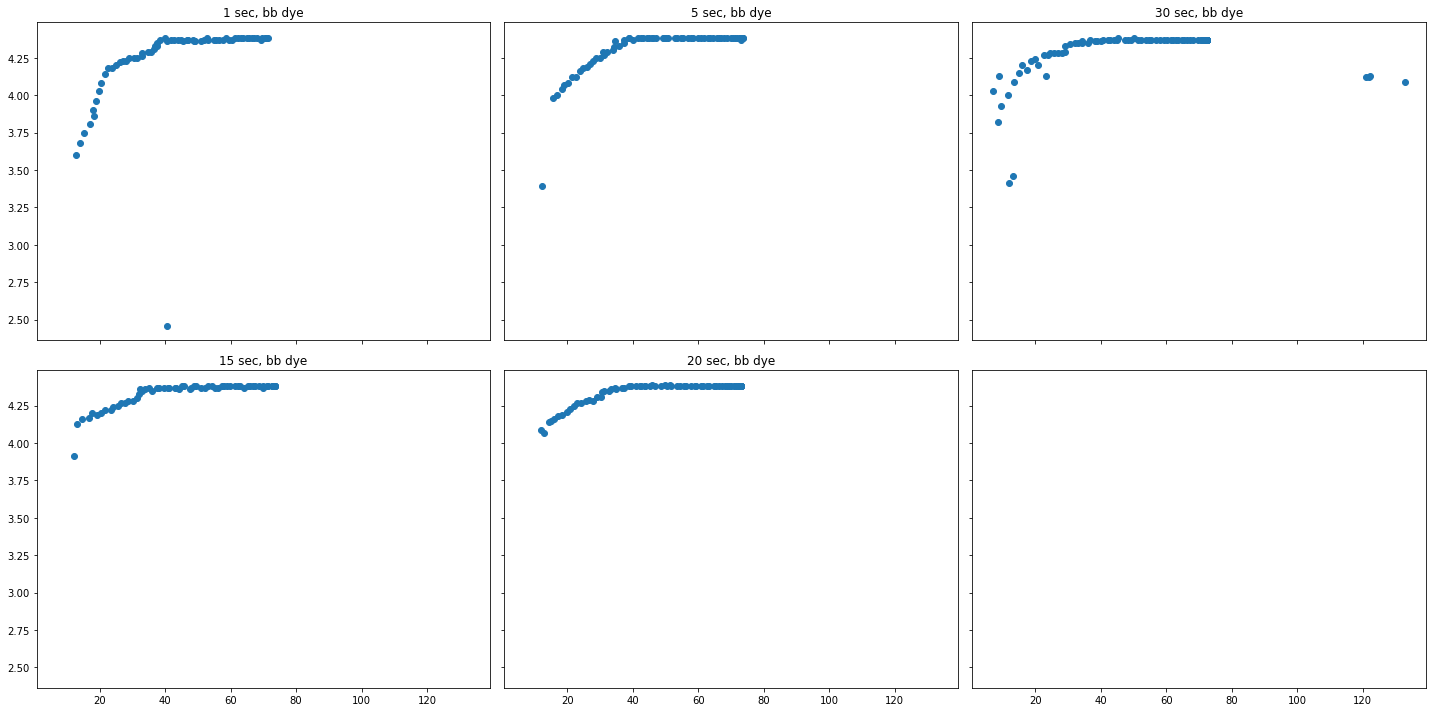

In [113]:
figure, axis = plt.subplots(2, 3, sharex = True, sharey= True, figsize = [20,10])


axis[0,0].plot(x_degrees1_bb18, y_width1_bb18, 'o')
axis[0,0].set_title("1 sec, bb dye")


axis[0,1].plot(x_degrees2_bb18, y_width2_bb18, 'o')
axis[0,1].set_title("5 sec, bb dye")


axis[1,0].plot(x_degrees3_bb18, y_width3_bb18, 'o')
axis[1,0].set_title("15 sec, bb dye")


axis[1,1].plot(x_degrees4_bb18, y_width4_bb18, 'o')
axis[1,1].set_title("20 sec, bb dye")


axis[0,2].plot(x_degrees5_bb18, y_width5_bb18, 'o')
axis[0,2].set_title("30 sec, bb dye")

plt.tight_layout()

plt.show()

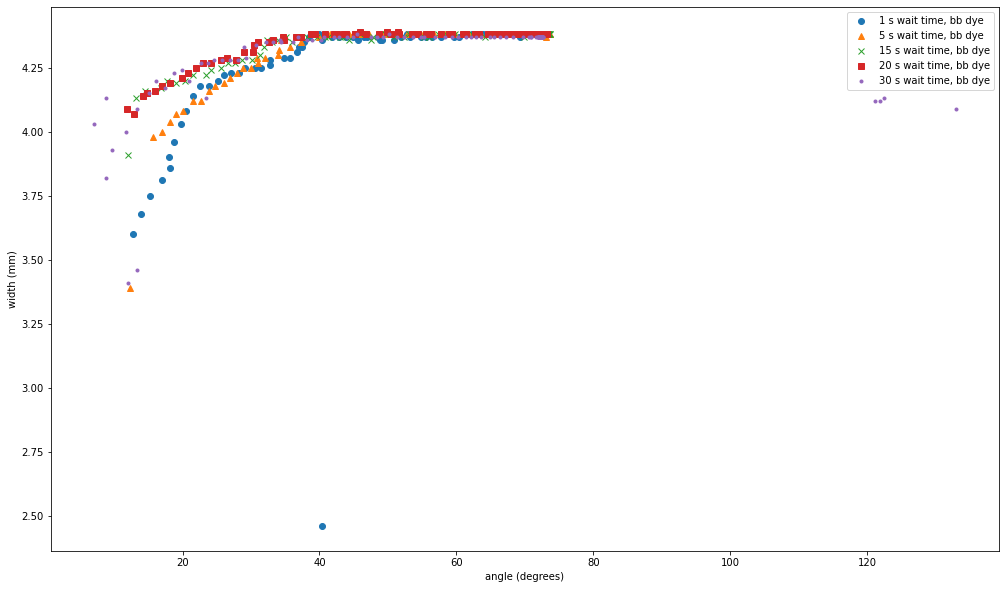

In [119]:
#dye 
plt.figure(figsize =[17,10])

plt.plot(x_degrees1_bb18, y_width1_bb18, 'o', label="1 s wait time, bb dye")

plt.plot(x_degrees2_bb18, y_width2_bb18, '^', label="5 s wait time, bb dye")

plt.plot(x_degrees3_bb18, y_width3_bb18, 'x', label="15 s wait time, bb dye")

plt.plot(x_degrees4_bb18, y_width4_bb18, 's', label="20 s wait time, bb dye")

plt.plot(x_degrees5_bb18, y_width5_bb18, '.', label="30 s wait time, bb dye")

plt.xlabel("angle (degrees)")
plt.ylabel("width (mm)")
plt.legend()
# plt.xlim(10,90)
# plt.ylim(3, 5)
plt.show()